### Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [2]:
data=pd.read_csv('kindle_reviews.csv')
data

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982615,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982617,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600


### Checking the shape, columns of the dataset

In [3]:
data.shape

(982619, 10)

In [4]:
data.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

### Checking the information of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982619 entries, 0 to 982618
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      982619 non-null  int64 
 1   asin            982619 non-null  object
 2   helpful         982619 non-null  object
 3   overall         982619 non-null  int64 
 4   reviewText      982597 non-null  object
 5   reviewTime      982619 non-null  object
 6   reviewerID      982619 non-null  object
 7   reviewerName    978803 non-null  object
 8   summary         982618 non-null  object
 9   unixReviewTime  982619 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 75.0+ MB


### Checking the missing value and clearing it

In [6]:
data.isna().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

In [7]:
data.dropna(axis=0, inplace=True)
data.isna().sum()

Unnamed: 0        0
asin              0
helpful           0
overall           0
reviewText        0
reviewTime        0
reviewerID        0
reviewerName      0
summary           0
unixReviewTime    0
dtype: int64

In [8]:
data.shape

(978780, 10)

### Descriptive analysis

In [9]:
data.describe()

,Unnamed: 0,overall,unixReviewTime
count,978780.000000,978780.000000,9.787800e+05
mean,491931.851952,4.348587,1.378195e+09
std,283561.851400,0.954144,2.298750e+07
min,0.000000,1.000000,9.522144e+08
25%,246708.750000,4.000000,1.365206e+09
50%,492355.500000,5.000000,1.383523e+09
75%,737268.250000,5.000000,1.396138e+09
max,982618.000000,5.000000,1.406074e+09


In [10]:
data.corr()

,Unnamed: 0,overall,unixReviewTime
Unnamed: 0,1.000000,0.140039,0.686957
overall,0.140039,1.000000,0.063844
unixReviewTime,0.686957,0.063844,1.000000


### Renaming the columns and removing the unwanted columns

In [11]:
data.rename(columns={'asin':'ProductId', 'overall':'Score', 'reviewText':'Text','reviewTime':'Reviewdate', 'reviewerID':'UserId',
                     'summary':'Summary', 'unixReviewTime':'Reviewtime'}, inplace=True)
data.head()

,Unnamed: 0,ProductId,helpful,Score,Text,Reviewdate,UserId,reviewerName,Summary,Reviewtime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [12]:
review_data=data.drop(['Unnamed: 0','helpful','Reviewdate','reviewerName'],axis=1)

In [13]:
review_data.head()

,ProductId,Score,Text,UserId,Summary,Reviewtime
0,B000F83SZQ,5,I enjoy vintage books and movies so I enjoyed ...,A1F6404F1VG29J,Nice vintage story,1399248000
1,B000F83SZQ,4,This book is a reissue of an old one; the auth...,AN0N05A9LIJEQ,Different...,1388966400
2,B000F83SZQ,4,This was a fairly interesting read. It had ol...,A795DMNCJILA6,Oldie,1396569600
3,B000F83SZQ,5,I'd never read any of the Amy Brewster mysteri...,A1FV0SX13TWVXQ,I really liked it.,1392768000
4,B000F83SZQ,4,"If you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,1395187200


In [14]:
review_data.describe()

,Score,Reviewtime
count,978780.000000,9.787800e+05
mean,4.348587,1.378195e+09
std,0.954144,2.298750e+07
min,1.000000,9.522144e+08
25%,4.000000,1.365206e+09
50%,5.000000,1.383523e+09
75%,5.000000,1.396138e+09
max,5.000000,1.406074e+09


In [15]:
review_data.corr()

,Score,Reviewtime
Score,1.000000,0.063844
Reviewtime,0.063844,1.000000


### Plotting the graph

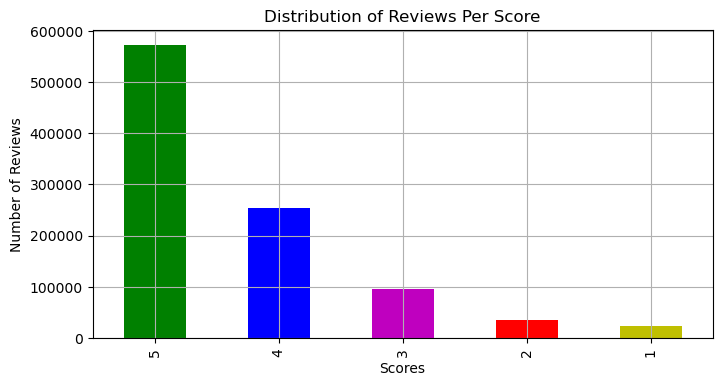

In [16]:
category = review_data['Score'].value_counts()

plt.figure(figsize=(8,4))
colors = ['g','b','m','r','y']
category.plot(kind='bar', color=colors)
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Reviews Per Score")
plt.show()

In [17]:
def partition(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'

Score = review_data['Score']
pos_neg = Score.map(partition)
review_data['Score'] = pos_neg

review_data.head()

,ProductId,Score,Text,UserId,Summary,Reviewtime
0,B000F83SZQ,Positive,I enjoy vintage books and movies so I enjoyed ...,A1F6404F1VG29J,Nice vintage story,1399248000
1,B000F83SZQ,Positive,This book is a reissue of an old one; the auth...,AN0N05A9LIJEQ,Different...,1388966400
2,B000F83SZQ,Positive,This was a fairly interesting read. It had ol...,A795DMNCJILA6,Oldie,1396569600
3,B000F83SZQ,Positive,I'd never read any of the Amy Brewster mysteri...,A1FV0SX13TWVXQ,I really liked it.,1392768000
4,B000F83SZQ,Positive,"If you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,1395187200


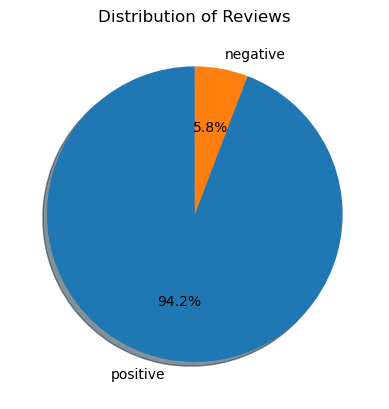

In [18]:
category_score= review_data['Score'].value_counts()

l=['positive','negative']
# Create a pie chart
plt.pie(category_score, labels=l,startangle=90,autopct='%1.1f%%',shadow=True)
plt.title("Distribution of Reviews")
plt.show()

### Importing train_test_split, TfidfVectorizer, Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split
x = review_data['Text']
y = review_data['Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(min_df=10, max_features=5000)
text_vec.fit(x_train.values)

train_text = text_vec.transform(x_train.values)
test_text = text_vec.transform(x_test.values)

print("Shape of Matrix - TFIDF")
print(train_text.shape)
print(test_text.shape)

Shape of Matrix - TFIDF
(783024, 5000)
(195756, 5000)


In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_text,y_train)

LogisticRegression()

In [22]:
y_pred=model.predict(test_text)
y_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

### Checking accuracy score

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_pred)*100

96.01033940211283

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
performance=confusion_matrix(y_test,y_pred)
performance

array([[  5576,   6000],
       [  1810, 182370]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.75      0.48      0.59     11576
    Positive       0.97      0.99      0.98    184180

    accuracy                           0.96    195756
   macro avg       0.86      0.74      0.78    195756
weighted avg       0.96      0.96      0.96    195756



In [29]:
d = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
t= pd.crosstab(d["Actual"],d["Predicted"],rownames = ["Actual"],colnames = ["Predicted"])


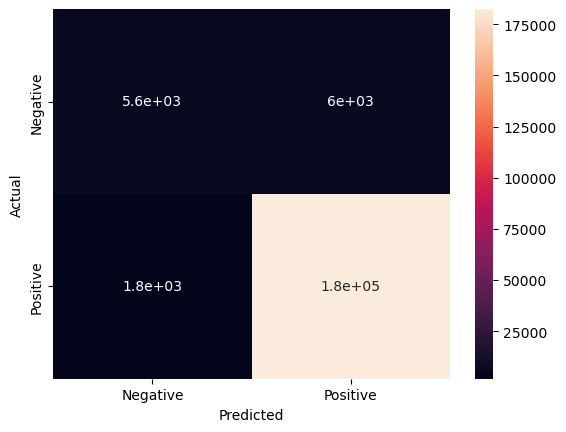

In [30]:
sns.heatmap(t,annot = True)  # annot=True is used for reflecting the values
plt.show()

In [31]:
y_pred_list = y_pred.tolist()
y_pred_list[:5]

['Positive', 'Positive', 'Positive', 'Positive', 'Positive']

In [32]:
final_test = pd.DataFrame({'Text':x_test, 'Review':y_pred_list})
final_test.head(10)

,Text,Review
94975,"Trophies is an excellent mystery, full of comp...",Positive
499241,I was surprised by the depth of emotion in thi...,Positive
363177,First let me say I loved this story. It keep m...,Positive
639354,Laurell Hamilton never disappoints but I wish...,Positive
111676,Definitely different than any books I have eve...,Positive
611049,This one caught my eye right away and held my ...,Positive
810442,Disclosure: I have known author Beth Barany a...,Positive
138607,I found this book action packed and interestin...,Positive
832850,This book is filled with excellent collection ...,Positive
542187,"A fun, quick read about a college professor an...",Positive


In [33]:
final_test.values[50]

array(['This was the best series of books that I have ever read love the romance and the passion the characters show it was truly impressive. The drama and secrets of the book were really good and the challenges that they had to overlook.',
       'Positive'], dtype=object)

In [35]:
final_test.values[25]

array(['"Damaged Goods" is the second book that I\'ve read and reviewed by this talented author. The first one is not part of this series, therefore, this is my first exposure to the main character, Hannibal Jones. He is what appears to be a really "neat" guy. He is a private investigator who knows how to get to the bottom of any problem that comes his way. Jones is extremely capable and efficient as he sniffs out a crime in order to bring about some kind of justice in his own unique way. In this fictional novel, Jones remains unintimidated by some heavy duty, mob connected individuals...and refuses to cower in the presence of some very descriptive crime scenes. He also appears to be a man with a conscience which further endears him to me. His main squeeze is successful lawyer, Cindy Santiago, whose presence spices up the plot with their little romance.Author Austin Camacho manages to adeptly spin a suspenseful yarn as he entices his reading audience to be drawn right into the storylin